In [5]:
import pandas as pd

df = pd.read_csv('owid-covid-data.csv')
df.columns
df.head()
df.isnull().sum()

iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64

In [6]:
# Check column names
print(df.columns)

# View basic info
df.info()

# Check for missing values
df.isnull().sum().sort_values(ascending=False)


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

weekly_icu_admissions                      339880
weekly_icu_admissions_per_million          339880
excess_mortality_cumulative_per_million    337901
excess_mortality                           337901
excess_mortality_cumulative                337901
                                            ...  
new_deaths_per_million                       9574
population                                      0
date                                            0
location                                        0
iso_code                                        0
Length: 67, dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'])
countries = ['Kenya', 'United States', 'India']
df_countries = df[df['location'].isin(countries)]
df_countries = df_countries.dropna(subset=['total_cases', 'total_deaths'])
df_countries = df_countries.interpolate()

df_countries.info()
df_countries.isnull().sum().sort_values(ascending=False)



<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 139843 to 330865
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    3944 non-null   object        
 1   continent                                   3944 non-null   object        
 2   location                                    3944 non-null   object        
 3   date                                        3944 non-null   datetime64[ns]
 4   total_cases                                 3944 non-null   float64       
 5   new_cases                                   3944 non-null   float64       
 6   new_cases_smoothed                          3944 non-null   float64       
 7   total_deaths                                3944 non-null   float64       
 8   new_deaths                                  3944 non-null   float64       
 9   new_de

weekly_icu_admissions_per_million     3944
weekly_icu_admissions                 3944
weekly_hosp_admissions_per_million    2759
weekly_hosp_admissions                2759
icu_patients                          2753
                                      ... 
total_tests_per_thousand                 0
continent                                0
new_deaths_per_million                   0
stringency_index                         0
iso_code                                 0
Length: 67, dtype: int64

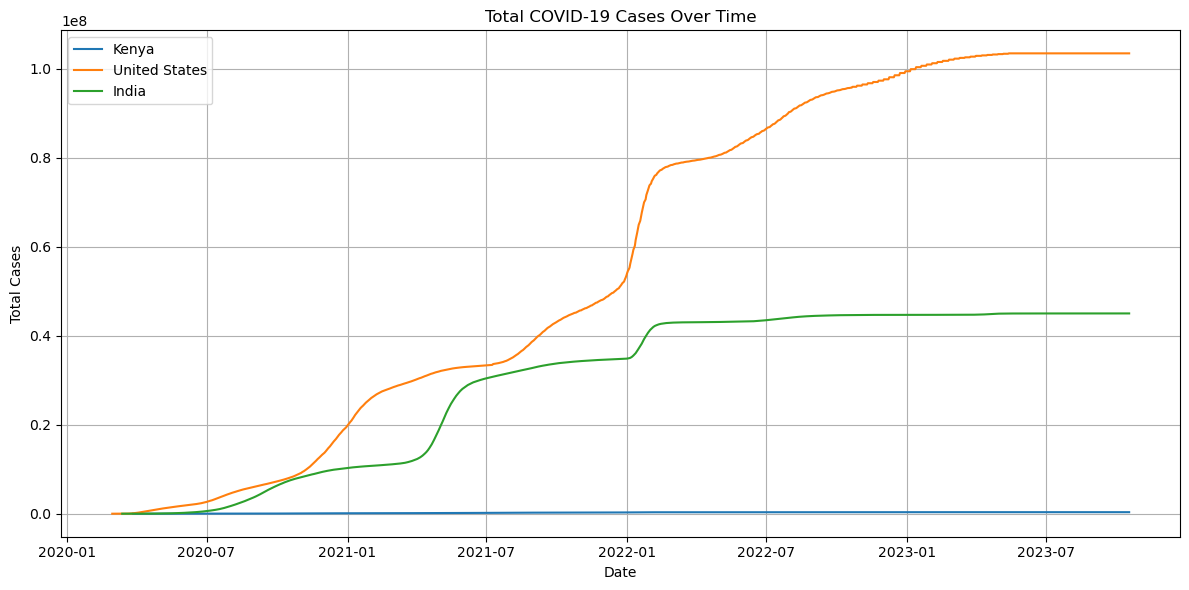

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


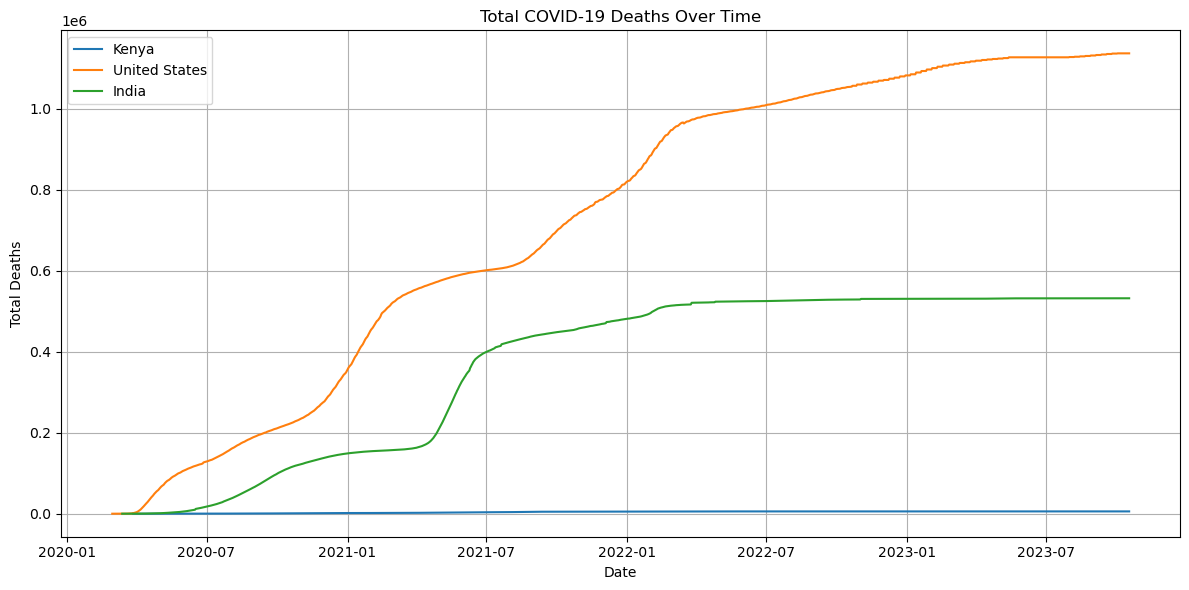

In [9]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


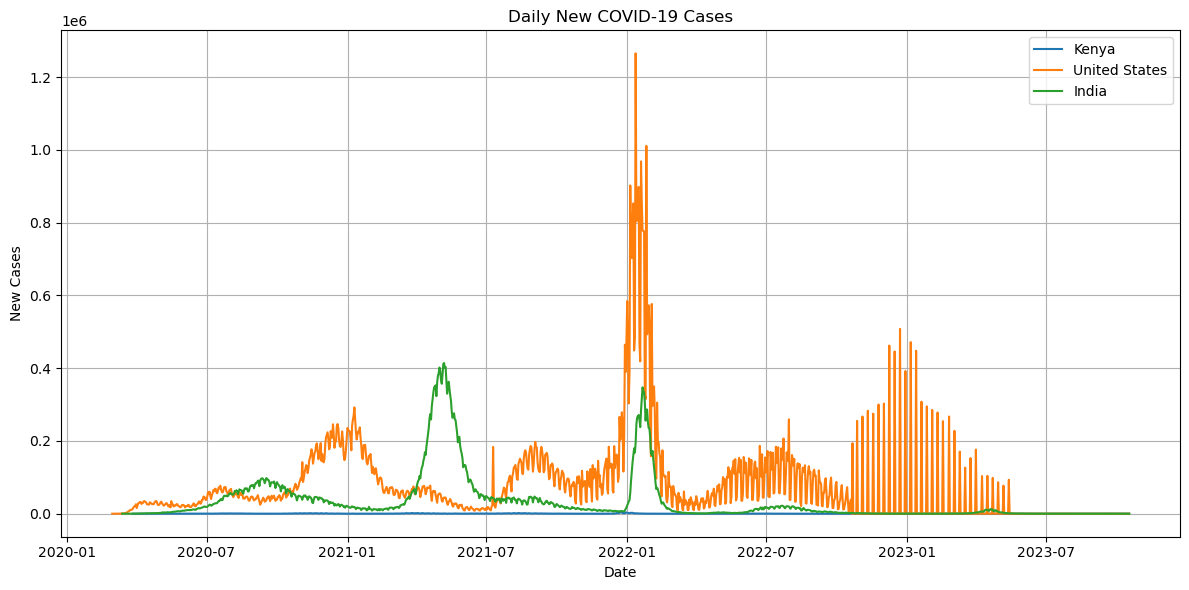

In [10]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


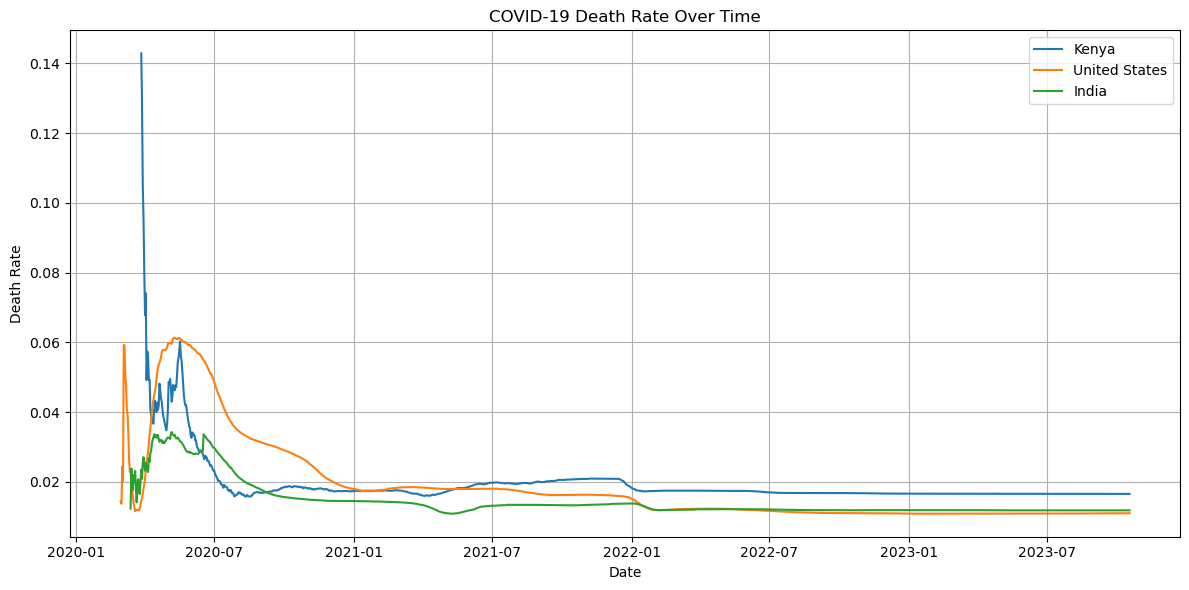

In [11]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country].copy()
    country_data['death_rate'] = country_data['total_deaths'] / country_data['total_cases']
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


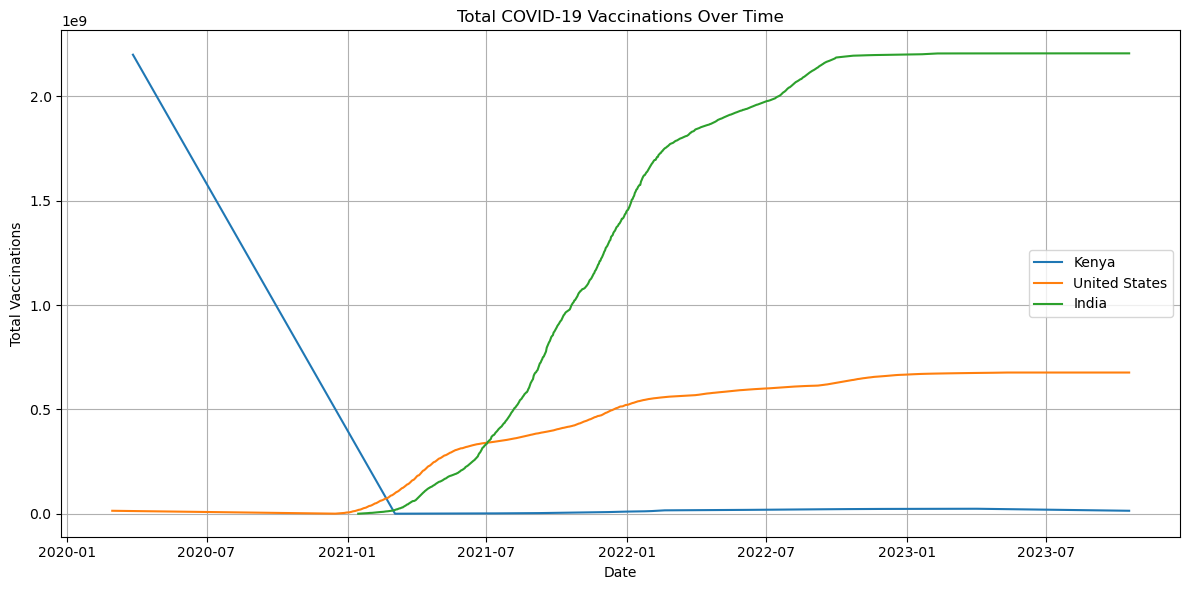

In [12]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


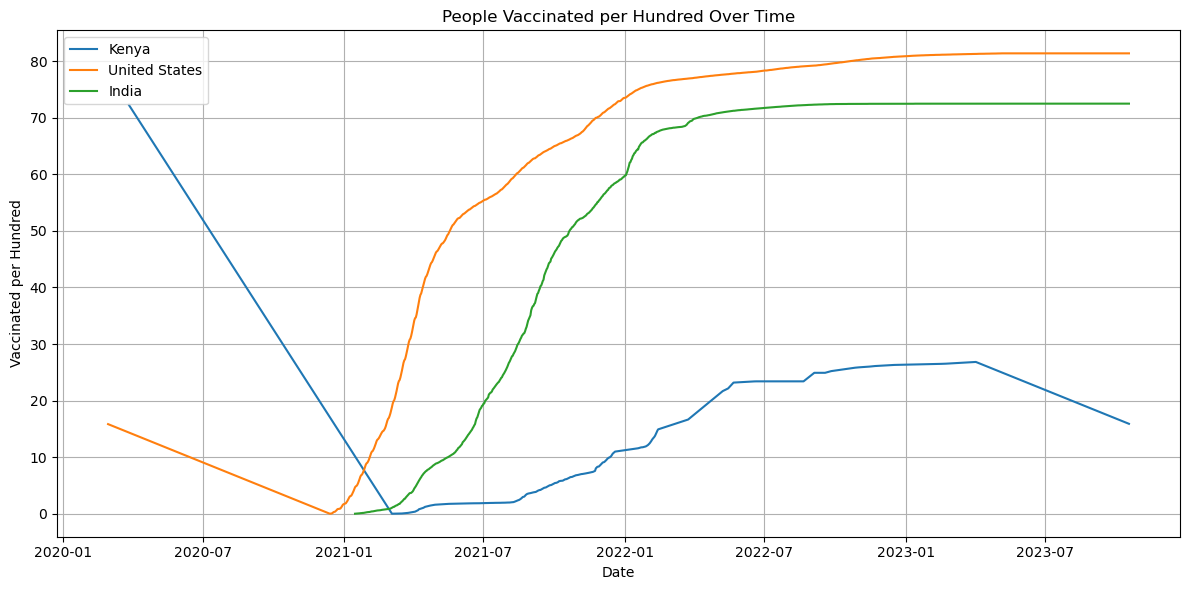

In [13]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['people_vaccinated_per_hundred'], label=country)

plt.title('People Vaccinated per Hundred Over Time')
plt.xlabel('Date')
plt.ylabel('Vaccinated per Hundred')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


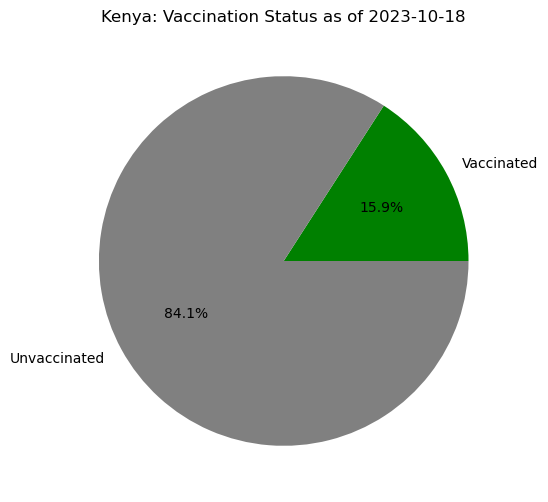

In [14]:
# Latest data for Kenya
kenya_latest = df_countries[(df_countries['location'] == 'Kenya') & (df_countries['people_vaccinated_per_hundred'].notna())].sort_values('date').iloc[-1]

vaccinated = kenya_latest['people_vaccinated_per_hundred']
unvaccinated = 100 - vaccinated

plt.figure(figsize=(6, 6))
plt.pie([vaccinated, unvaccinated], labels=['Vaccinated', 'Unvaccinated'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title(f"Kenya: Vaccination Status as of {kenya_latest['date'].date()}")
plt.show()
